<a href="https://colab.research.google.com/github/sibi601/EDA-Hotel_Booking/blob/main/EDA_hotel_booking_analysis_capstoneproject_SIBIN_IQBAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Hotel Booking Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name**    - SIBIN IQBAL


# **Project Summary -**

Introduction:

The purpose of this EDA is to analyze a hotel booking dataset and understand the key trends, patterns and insights related to hotel bookings. The objective is to use this analysis to identify potential opportunities for the hotel to improve its booking performance.

Data Description:

The hotel booking dataset used for this analysis contains columns like hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights etc.
Initially,The dataset contains over  119390 rows and 32 columns.

Data Cleaning and Preparation:

The first step in the analysis was to clean and prepare the data for analysis. This involved removing missing values, converting data into appropriate formats and dealing with any outliers.
It was found that 31994 duplicate rows.So ,I removed the duplicates and finally we had 87396 rows and 32 columns.I removed the null values with relevant values: Four columns were there with null values namely 'company' , 'agent' , 'country' and 'children'then changed the data type of columns 'children' and 'agent'.ThenI added mainly three columns which can be further used in the project for data visualization and for providing more detailed information.They are 'total_night_spent', 'total_guest' and 'earnings'. In order to find the 'total_night_spent' ,I took sum of the columns 'stays_in_week_nights' and 'stays_in_weekend_nights'. I find the 'earnings' by multiplying 'total_night_spent' and 'adr'. Lastly Inorder to find the 'total_guest', I added 'adults', 'children' and 'babies'.

After the above steps Univariate Analysis, Bivariate Analysis, Multivariate Analysis followed by suggestions to client and finally made a conclusion with the prepared analysis.

# **GitHub Link -**

https://github.com/sibi601/EDA-Hotel_Booking

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

There is a lack of insight into customer booking behavior, resulting in poor occupancy rates and revenue. The problem statement is to analyze customer booking data to identify patterns and trends in customer behavior, and use this information to inform decisions that will increase occupancy rates and revenue for the hotel.It mentions the lack of insight into customer booking behavior and it's negative impact, measurable as it mentions about poor occupancy rate and revenue, and actionable as it proposed to analyze data, identify patterns and trends and use that information to make decision.


#### **Define Your Business Objective?**

To inform decisions that will ultimately increase revenue and improve customer satisfaction for the hotel, by optimizing pricing strategies, inventory management, targeting specific customer segments, identifying opportunities for upselling and cross-selling and analyzing distribution channels.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [29]:
# Import Libraries

import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

### Dataset Loading

In [30]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
# Load Dataset

hb_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ASSIGNMENTS/MODULE 1/EDA-CAPSTONE PROJECT/Hotel Bookings.csv")

### Dataset First View

In [32]:
# Dataset First Look
hb_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [33]:
# Dataset Rows & Columns count

rows, cols = hb_df.shape
print("Number of rows: ", rows)
print("Number of columns: ", cols)

Number of rows:  119390
Number of columns:  32


### Dataset Information

In [34]:
# Dataset Info

hb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [35]:
# Dataset Duplicate Value Count

duplicate_rows=len(hb_df[hb_df.duplicated()])
duplicate_rows

31994

In [36]:
#Inorder to remove the duplicate rows from the dataset,I use drop_duplicates
hb_df.drop_duplicates(inplace=True)
hb_df.shape # 87936 rows and 32 columns

(87396, 32)

#### Missing Values/Null Values

In [37]:
# Missing Values/Null Values Count

missing_values=hb_df.isnull().sum().sort_values(ascending=False)

hb_df.fillna(np.nan,inplace=True)
missing_values

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


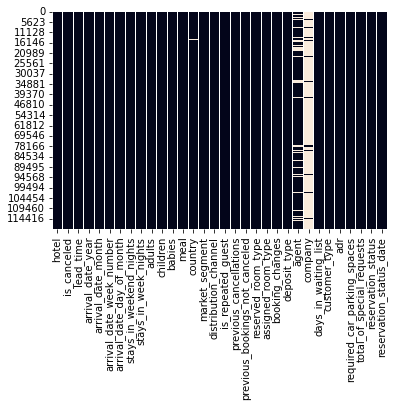

In [38]:
# Visualizing the missing values
#In seaborn library I use the heatmap() function to create a heatmap of missing values in the DataFrame. The heatmap will show the proportion of missing values in each column and row of the DataFrame.
sns.heatmap(hb_df.isnull(), cbar=False)


### What did you know about your dataset?

The dataset given is a dataset from Hotel Industry.

There are 119390 rows and 32 columns in this dataset.There are 31994 duplicate rows in the dataset.After removing duplicates we have 87936 rows and 32 columns.

The columns include information such as the hotel, if the booking was cancelled, the lead time before the arrival date, the arrival date, the number of nights stayed, the number of adults, children, and babies, the meal type, the country of origin, the market segment, the distribution channel, whether the guest is a repeat customer, previous cancellations, previous bookings not cancelled, the type of room reserved and assigned, the number of booking changes, the deposit type, the agent or company that made the booking, the number of days on the waiting list, the customer type, the average daily rate, the number of required car parking spaces, the number of special requests, the reservation status, and the date of the reservation status.

 The goal of this analysis is to understand and analyze patterns and trends in hotel booking data in order to inform business decisions and improve the overall performance of the hotel. This can include identifying factors that affect bookings, such as seasonality and promotions, as well as understanding the characteristics of hotel guests and their booking behaviors.It can also help to identify opportunities for revenue growth and to monitor competitors in the market. Overall, the goal of hotel booking analysis is to use data to gain insights that can inform strategic decision-making and improve overall performance.

## ***2. Understanding Your Variables***

###Knowing the columns

In [39]:
# Dataset Columns
hb_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

###Descriptive Summary

In [40]:
# Dataset Describe
hb_df.describe()
#Descriptive summary of all columns 
hb_df.describe().T # To transpose data

,count,mean,std,min,25%,50%,75%,max
is_canceled,87396.0,0.274898,0.446466,0.00,0.0,0.0,1.0,1.0
lead_time,87396.0,79.891368,86.052325,0.00,11.0,49.0,125.0,737.0
arrival_date_year,87396.0,2016.210296,0.686102,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,87396.0,26.838334,13.674572,1.00,16.0,27.0,37.0,53.0
arrival_date_day_of_month,87396.0,15.815541,8.835146,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,87396.0,1.005263,1.031921,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,87396.0,2.625395,2.053584,0.00,1.0,2.0,4.0,50.0
adults,87396.0,1.875795,0.626500,0.00,2.0,2.0,2.0,55.0
children,87392.0,0.138640,0.455881,0.00,0.0,0.0,0.0,10.0
babies,87396.0,0.010824,0.113597,0.00,0.0,0.0,0.0,10.0


### Variables Description 

* hotel: indicates the hotel where the booking was made (Resort Hotel or City Hotel)

* is_canceled: indicates if the booking was canceled (1) or not (0)

* lead_time: number of days that elapsed between the entering date of the booking into the PMS and the arrival date

* arrival_date_year: year of the arrival date

* arrival_date_month: month of the arrival date

* arrival_date_week_number: week number of the arrival date

* arrival_date_day_of_month: day of the month of the arrival date

* stays_in_weekend_nights: number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

* stays_in_week_nights: number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

* adults: number of adults

* children: number of children

* babies: number of babies

* meal: type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

* country: country of origin.

* market_segment: market segment designation which customer belongs to.

* distribution_channel: booking distribution channel.In categories, the term “TA” means Travel Agents and “TO” means Tour Operators

* is_repeated_guest: indicates if the booking name was from a repeated guest (1) or not (0)

* previous_cancellations: number of previous bookings that were cancelled by the customer prior to the current booking

* previous_bookings_not_canceled: number of previous bookings not cancelled by the customer prior to the current booking

* reserved_room_type: code of room type reserved.

* assigned_room_type: code for the type of room assigned to the booking. 

* booking_changes: number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

* deposit_type: indicates if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

* agent: ID of the travel agency that made the booking

* company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

* days_in_waiting_list: number of days the booking was in the waiting list before it was confirmed to the customer

* customer_type: type of booking -'Transient', 'Contract', 'Transient-Party', 'Group'

* ADR: Average daily rate of the booking.

* required_car_parking_spaces: the number of required car parking spaces

* total_of_special_requests: total number of special request made.

* reservation_status: the number of special requests made, the reservation status (e.g. 'Check-Out', 'Canceled', 'No-Show')

* reservation_status_date: date of the reservation status.

### Check Unique Values for each variable.

In [41]:
# Check Unique Values for each variable.

for col in hb_df.columns:
    print("Unique values in column '{}': {}".format(col, hb_df[col].unique()))

#Similarily in order to find the number of unique value we can use nunique().

for col in hb_df.columns:
    print("Unique values in column '{}': {}".format(col, hb_df[col].nunique()))


Unique values in column 'hotel': ['Resort Hotel' 'City Hotel']
Unique values in column 'is_canceled': [0 1]
Unique values in column 'lead_time': [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349

## 3. ***Data Wrangling***

### Data Wrangling Code

####Finding and replacing null values

In [42]:
# Lets fill the columns having null values with the relevant values



####Changing the datatype of some required columns

####Addition of new columns

### What all manipulations have you done and insights you found?

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **I)** *UNIVARIATE ANALYSIS*

#### Chart-1

In [43]:
# Chart - 1 visualization code


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart-2- Which hotel has more cancellation?

In [44]:
# Chart - 2 visualization code


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

####Chart-3- 

In [45]:
# Chart - 3 visualization code


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

####Chart-4- 

In [46]:
# Chart - 4 visualization code



##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

####Chart-5- What are the total number of guests arrived per year in both hotels? 

In [47]:
# Chart - 5 visualization code




##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart-6- 


In [48]:
# Chart - 6 visualization code



##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart-7- 


In [49]:
# Chart - 7 visualization code



##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart-8- 

In [50]:
# Chart - 8 visualization code



##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

####Chart-9- 

In [51]:
# Chart - 9 visualization code




##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

### **II)** *BIVARIATE ANALYSIS*

####Chart-10- 

In [52]:
# Chart - 10 visualization code


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart-11- 

In [53]:
# Chart - 11 visualization code



##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart-12-





In [54]:
# Chart - 12 visualization code


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

####Chart-13- 

In [55]:
# Chart - 13 visualization code


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

####Chart-14- How does the meal type impact the number of nights stayed?

In [56]:
# Chart - 14 visualization code


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

####Chart-15-

In [57]:
# Chart - 15 visualization code


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

####Chart-16- 

In [58]:
# Chart - 16 visualization code



##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

####Chart-17- 


In [59]:
# Chart - 17 visualization code


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

####Chart-18- 


In [60]:
# Chart - 18 visualization code


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart-19- 


In [61]:
# Chart - 19 visualization code



##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

We can infer that:

* Eventhough City Hotel has more bookings than Resort Hotel,the cancellations are high in City Hotel than Resort Hotel.

* Number of customers who does the booking and made a no show is more in City Hotel than Resort Hotel.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart-20- 

In [62]:
# Chart - 20 visualization code



##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

### **III)** *MULTIVARIATE ANALYSIS*

#### Chart-21- Correlation Heatmap

In [63]:
# Correlation Heatmap visualization code



###### 1. Why did you pick the specific chart?

###### 2. What is/are the insight(s) found from the chart?

#### Chart-22- Pair Plot 

In [64]:
# Pair Plot visualization code


In [65]:
# Pair Plot visualization code


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

# **Conclusion**

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***